In [40]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import itertools as it
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import mutual_info_regression as mir
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder as onehot
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
import xgboost as xgb
import lightgbm as lgb
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [41]:
x_train = pd.read_csv('../data/final_dataset/x_train.csv')
y_train = pd.read_csv('../data/y_train_ZAN5mwg.csv')
x_test = pd.read_csv('../data/final_dataset/x_test.csv')
pd.set_option('display.max_columns', None)

In [42]:
x_train

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,DE_NET_IMPORT,FR_NET_IMPORT,DE_GAS,FR_GAS,DE_COAL,FR_COAL,DE_HYDRO,FR_HYDRO,DE_NUCLEAR,FR_NUCLEAR,DE_SOLAR,FR_SOLAR,DE_WINDPOW,FR_WINDPOW,DE_LIGNITE,DE_RESIDUAL_LOAD,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,DE_NON_RENEWABLE,DE_RENEWABLE,DE_EXCESS_ENERGY,FR_NON_RENEWABLE,FR_RENEWABLE,FR_EXCESS_ENERGY,DE_WIND_SQCB,FR_WIND_SQCB,DE_WIND_CBRT,FR_WIND_CBRT,DATE,DE_WIND_EXCESS,FR_WIND_EXCESS,FR_OVERCON,DE_NUCLEAR_CLUSTER,DE_NUCLEAR_0,DE_NUCLEAR_1,DE_NUCLEAR_2,DE_NUCLEAR_3,DE_NUCLEAR_4,DE_NUCLEAR_5
0,1054,206,0,0.210099,-0.427458,-0.606523,-0.074847,-0.692860,0.441238,-0.213766,0.740627,0.288782,2.209047,0.207838,0.709614,-0.190463,0.101766,1.248911,-0.573370,-0.269460,0.870344,0.626666,-0.444661,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.255896,0.060770,-0.075508,2.761824,1.737443,4.289168,-0.115448,1.187289,1.499299,1.058872,1.374902,1.029015,1.172562,2020-07-24,-0.424541,-1.081876,-2.063908,4,0.0,0.0,0.0,0.0,1.0,0.0
1,2049,501,0,-0.022399,-1.003452,-0.022063,0.573520,1.130838,0.174773,0.426940,-0.170392,-0.762153,0.187964,-0.807112,-1.882740,-2.185961,1.987428,3.237380,-0.035514,-0.107350,-0.194308,-0.395469,-1.183194,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.653341,-0.014132,-0.519628,-2.072667,2.139877,0.089610,-2.521174,2.322919,0.805198,2.262316,1.950336,1.504100,1.396544,2021-05-15,-0.802641,-0.491355,0.609125,3,0.0,0.0,0.0,1.0,0.0,0.0
2,1924,687,0,1.395035,1.978665,1.021305,0.622021,1.682587,2.351913,2.122241,1.572267,0.777053,-0.108578,0.779142,-1.897109,0.735137,-1.115583,-0.371039,-0.298755,-0.141239,0.428272,1.336625,1.947273,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.435291,0.659294,0.113270,2.455344,-1.522916,-0.462607,3.634432,0.266865,1.922631,1.748246,1.784051,1.322213,1.335684,2021-11-17,-0.289006,-0.357727,-1.384961,3,0.0,0.0,0.0,1.0,0.0,0.0
3,297,720,1,-0.983324,-0.849198,-0.839586,0.270870,-0.563230,0.487818,0.194659,-1.473817,-0.786025,-0.368417,1.320483,-0.205547,-1.589554,1.751523,0.562944,-0.010090,0.366885,-2.330557,-1.191889,-0.976974,-1.114838,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.777510,-0.346174,0.904255,-3.522102,1.373016,-1.165763,-2.180920,2.250313,0.918591,1.240122,1.401447,1.113608,1.183827,2021-12-20,-0.173801,-0.380780,-0.250896,1,0.0,1.0,0.0,0.0,0.0,0.0
4,1101,818,0,0.143807,-0.617038,-0.924990,-0.036917,-0.990324,0.238693,-0.240862,1.003734,-0.274975,-0.230179,-0.795983,-0.005581,0.176935,0.693543,0.723587,-0.774941,-0.564498,0.691040,0.571613,-0.526267,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.170330,1.416915,2.306400,1.927887,-0.311578,1.472502,-0.338902,-0.636893,-0.358758,0.856207,0.920922,0.925315,0.959647,2022-03-28,-0.026802,-0.213282,-3.943384,1,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,459,809,1,1.529204,1.106682,-1.855327,0.218658,-1.450426,1.810665,1.388269,0.359723,-0.294001,-0.470809,1.708814,0.207266,0.712492,-1.325306,-0.855249,-0.057214,2.968535,0.790548,1.547782,0.509514,0.352199,0.393179,-0.540096,0.017301,-0.534811,-0.300242,0.745930,0.732981,1.128559,3.168202,-1.853329,-0.214331,1.806760,3.822101,4.522179,1.215644,1.540822,1.102562,1.241299,2022-03-19,-0.161827,2.000835,8.125044,1,0.0,1.0,0.0,0.0,0.0,0.0
1490,1674,887,0,1.618582,1.752840,0.611392,-0.449153,0.152146,1.972779,1.558300,0.561356,0.230746,-0.341147,2.957114,0.217922,0.926279,-1.222781,-0.923261,0.198857,0.789618,0.917482,1.358927,1.666252,1.036262,0.885839,-0.548776,-0.722460,0.129479,0.424804,0.796622,-0.142587,0.251082,3.669539,-1.365072,0.685885,2.715325,2.823470,3.785955,1.210390,1.112151,1.100177,1.054586,2022-06-05,0.262216,0.914461,-0.482733,1,0.0,1.0,0.0,0.0,0.0,0.0
1491,748,1083,1,0.856399,0.489199,-0.255778,1.5

In [43]:
def metric_train(output, test):
    # Calculate MSE and MAE for the benchmark
    mse = mean_squared_error(output, test)
    mae = mean_absolute_error(output, test)
    spearman_corr = spearmanr(output, test).correlation
    return mse, mae, spearman_corr

In [44]:
x_train = x_train.sort_values(by='ID')
x_test = x_test.sort_values(by='ID')
y_train = y_train.sort_values(by='ID')

In [45]:
x_train.drop(columns=['DATE', 'DE_NUCLEAR_CLUSTER', 'DE_NUCLEAR_0', 'DE_NUCLEAR_1', 'DE_NUCLEAR_2', 'DE_NUCLEAR_3', 'DE_NUCLEAR_4', 'DE_NUCLEAR_5'], inplace=True)
x_test.drop(columns=['DATE', 'DE_NUCLEAR_CLUSTER', 'DE_NUCLEAR_0', 'DE_NUCLEAR_1', 'DE_NUCLEAR_2', 'DE_NUCLEAR_3', 'DE_NUCLEAR_4', 'DE_NUCLEAR_5'], inplace=True)

In [46]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=88, eta=0.3, gamma=15, max_depth=5)
xgb_model.fit(x_train, y_train['TARGET'])
xgb_test_output = xgb_model.predict(x_train)
print('Spearman correlation for XGB: {:.1f}%'.format(100 * metric_train(xgb_test_output, y_train['TARGET'])[2]))
print('MSE for XGB: {:.1f}'.format(metric_train(xgb_test_output, y_train['TARGET'])[0]))
print('MAE for XGB: {:.1f}'.format(metric_train(xgb_test_output, y_train['TARGET'])[1]))

Spearman correlation for XGB: 27.4%
MSE for XGB: 1.0
MAE for XGB: 0.6


In [47]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'gamma': [5, 10, 15],
    'eta': [0.3, 0.5, 0.01],
    'subsample': [0.8],
    'colsample_bytree': [1]
}

def custom_spearman_scorer(estimator, X, y):
    predictions = estimator.predict(X)
    spearman_corr, _ = spearmanr(predictions, y)
    return spearman_corr

xgb_model = xgb.XGBRegressor(objective="reg:absoluteerror", random_state=88)

tscv = TimeSeriesSplit(n_splits=3)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=tscv.split(x_train), scoring=custom_spearman_scorer)

grid_search.fit(x_train, y_train['TARGET'])

best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Best parameters:", best_params)
print("Best score (negative spearman correlation):", best_score)



Best parameters: {'colsample_bytree': 1, 'eta': 0.3, 'gamma': 5, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Best score (negative spearman correlation): -0.19747923764953046


In [51]:
best_model = grid_search.best_estimator_
xgb_test_output = best_model.predict(x_train)
print('Spearman correlation for XGB: {:.1f}%'.format(100 * metric_train(xgb_test_output, y_train['TARGET'])[2]))
print('MSE for XGB: {:.1f}'.format(metric_train(xgb_test_output, y_train['TARGET'])[0]))
print('MAE for XGB: {:.1f}'.format(metric_train(xgb_test_output, y_train['TARGET'])[1]))

Spearman correlation for XGB: 73.8%
MSE for XGB: 1.0
MAE for XGB: 0.5


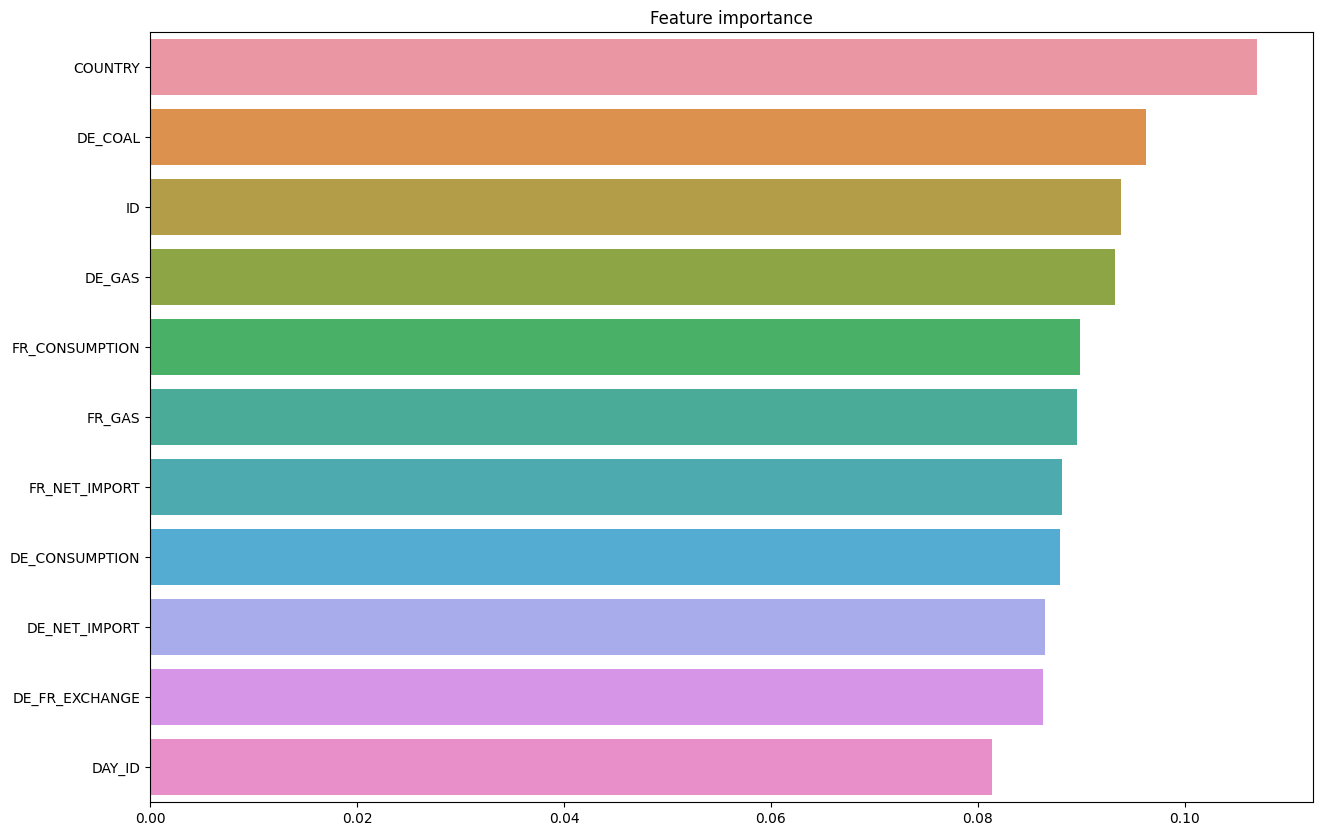

In [64]:
# Give me the feature importance of the best model
feature_importance = best_model.feature_importances_

# Sort the feature importance values in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_importance = feature_importance[sorted_indices]
sorted_columns = x_train.columns[sorted_indices]

# Plot the sorted feature importance
plt.figure(figsize=(15, 10))
sns.barplot(x=sorted_importance, y=sorted_columns)
plt.title('Feature importance')
plt.show()

In [58]:
# Use PCA method to reduce the number of features
pca = PCA(n_components=10)
pca.fit(x_train)
x_train_pca = pd.DataFrame(pca.transform(x_train), columns=[f'PCA_{i}' for i in range(1, 11)])
x_test_pca = pd.DataFrame(pca.transform(x_test), columns=[f'PCA_{i}' for i in range(1, 11)])

x_train_pca['ID'] = x_train['ID'].values
x_test_pca['ID'] = x_test['ID'].values

In [61]:
best_model = grid_search.best_estimator_
best_model.fit(x_train_pca, y_train['TARGET'])
xgb_test_output = best_model.predict(x_train_pca)
print('Spearman correlation for XGB: {:.1f}%'.format(100 * metric_train(xgb_test_output, y_train['TARGET'])[2]))
print('MSE for XGB: {:.1f}'.format(metric_train(xgb_test_output, y_train['TARGET'])[0]))
print('MAE for XGB: {:.1f}'.format(metric_train(xgb_test_output, y_train['TARGET'])[1]))

Spearman correlation for XGB: 60.9%
MSE for XGB: 1.0
MAE for XGB: 0.5


In [60]:
x_train_pca

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,ID
0,1074.696061,594.656968,-6.106599,1.024428,1.251864,-2.092850,-0.258646,-1.750252,2.186855,-0.575592,0
1,1068.958339,-557.330980,-0.084223,2.510067,-1.445452,-2.288329,-1.635839,-0.365281,1.779593,0.915815,2
2,1070.663093,276.667888,-0.779544,2.708828,-2.081267,-1.722543,-0.976073,0.286991,0.069558,2.314750,3
3,1069.859289,337.671707,1.538458,0.364381,0.312816,-0.722241,0.719362,-1.209501,-1.566858,2.111866,4
4,1068.268786,154.675855,-3.293854,-0.302992,2.071909,-0.303329,1.230932,-2.283155,-0.079223,0.706354,5
...,...,...,...,...,...,...,...,...,...,...,...
1489,-1068.889719,112.604775,10.032351,1.908739,-1.422215,-3.345519,-1.664486,0.412021,0.155671,0.615340,2142
1490,-1071.798491,-476.388601,8.199959,1.534196,-0.069151,-3.222503,-2.378701,0.173589,0.114438,-0.705977,2143
1491,-1072.828725,-486.385392,5.456882,1.701861,-0.028624,-2.402877,-2.666002,0.623274,-1.087293,0.159790,2144
1492,-1072.814291,-174.382981,-1.643984,1.279579,3.535367,-2.990473,-2.398011,0.243842,-0.834849,-0.634186,2145


In [62]:
# Submission
best_model = grid_search.best_estimator_
best_model.fit(x_train_pca, y_train['TARGET'])
xgb_test_output = best_model.predict(x_test_pca)
submission = pd.DataFrame({'ID': x_test['ID'], 'TARGET': xgb_test_output})
submission.to_csv('../data/submission/submission_7.csv', index=False)